In [7]:
import sys
import os
import torch
import torch.optim as optim
import torch.nn as nn
from generators import *
from discriminators import *
from utils.NiftiDataset import *
import utils.NiftiDataset as NiftiDataset
from torch.utils.data import DataLoader
from init import Options
from utils.utils import *
import nibabel as nib
import matplotlib.pyplot as plt


# -----  Loading the init options -----

batch_size=4
checkpoints_dir='./checkpoints'
data_path='./Data_folder/train' 
direction='image_to_label'
discriminatorLR=0.0002
discriminatorWeights='./checkpoints/d.pth'
drop_ratio=0
epoch_count=1
generatorLR=0.0002
generatorWeights='./checkpoints/g.pth'
gpu_ids='1,7'
image=None
img_channel=1
increase_factor_data=5
lamb=100
lr_decay_iters=50
lr_policy='lambda'
min_pixel=1
multi_gpu=None
ndf=128
netD='PatchGAN'
netG='Unet'
new_resolution=(0.6, 0.6, 2.5)
ngf=64
niter=100
niter_decay=100
output='./checkpoints/'
patch_size=[64, 64, 64]
resample=False
result=None
resume=0
save_fre=25
stride_inplane=32
stride_layer=16
val_path='./Data_folder/test/'
weights=None
workers=8

min_pixel = int(min_pixel * ((patch_size[0] * patch_size[1] * patch_size[2]) / 100))

if gpu_ids != '-1':
    num_gpus = len(gpu_ids.split(','))
else:
    num_gpus = 0
print('number of GPU:', num_gpus)
# -------------------------------------



# -----  Loading the list of data -----
train_list = create_list(data_path)
val_list = create_list(val_path)

for i in range(increase_factor_data):  # augment the data list for training

    train_list.extend(train_list)
    val_list.extend(val_list)

create_train_stats = False

if create_train_stats:
    train_labels = []
    for folder in os.listdir(data_path):
        if not folder.startswith("patient"): 
            continue
        label_data = nib.load(os.path.join(data_path, os.path.join(folder, "label.nii"))).get_fdata()
        train_labels.append(label_data)
    train_labels = np.array(train_labels)
    train_stats = np.array([train_labels.mean(), train_labels.std()])
    np.save("utils/train_stats.npy", train_stats)
else:
    train_stats = np.load("utils/train_stats.npy")

print('Train stats:', train_stats)    
print('Number of training patches per epoch:', len(train_list))
print('Number of validation patches per epoch:', len(val_list))
# -------------------------------------




# -----  Transformation and Augmentation process for the data  -----
trainTransforms = [
            NiftiDataset.Augmentation(),
            NiftiDataset.Padding((patch_size[0], patch_size[1], patch_size[2])),
            NiftiDataset.RandomCrop((patch_size[0], patch_size[1], patch_size[2]), drop_ratio, min_pixel),
            ]

train_set = NifitDataSet(train_list, direction=direction, transforms=trainTransforms, train=True, stats=train_stats) 
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=workers)
# -------------------------------------





# -----  Creating the Generator and discriminator -----





criterionMSE = nn.MSELoss()  # nn.MSELoss()
criterionGAN = GANLoss()
criterion_pixelwise = nn.L1Loss()




# -----  Training Cycle -----
print('Start training :) ')
epoch_count = epoch_count
mean_generator_total_loss = 0.0
mean_discriminator_loss = 0.0

for batch_idx, (data, label) in enumerate(train_loader):
    break

number of GPU: 2
Train stats: [0.         5.85545083]
Number of training patches per epoch: 960
Number of validation patches per epoch: 64
Start training :) 


In [8]:
label.max(), label.min(), label.mean(), label.std()

(tensor(2.2952), tensor(-0.1053), tensor(0.0074), tensor(0.0458))

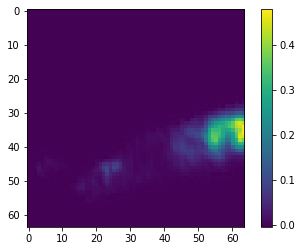

In [12]:
plt.imshow(label.cpu().detach().numpy()[0,0,:,40,:])
plt.colorbar()

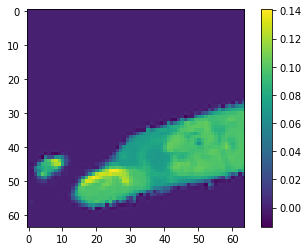

In [11]:
plt.imshow(data.cpu().detach().numpy()[0,0,:,40,:])
plt.colorbar()

In [19]:
ref_data = nib.load(os.path.join(data_path, os.path.join("patient_1", "label.nii"))).get_fdata()

In [22]:
ref_data.min(), ref_data.max()

(0.0, 5.550989627838135)

In [21]:
ref2 = (ref_data - ref_data.min()) / (ref_data.max() - ref_data.min())

In [31]:
label_data = nib.load(os.path.join(data_path, os.path.join("patient_0", "label.nii"))).get_fdata()

In [32]:
label_data.max(), label_data.min()

(4.69003963470459, 0.0)

In [33]:
label_data = (label_data - ref_data.min()) / (ref_data.max() - ref_data.min())
# label_data = (label_data - ref2.mean()) / ref2.std()

In [34]:
label_data.min()

0.0

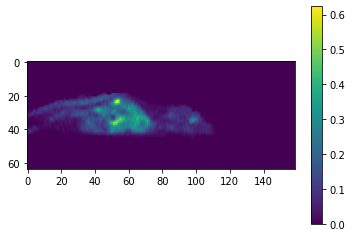

In [35]:
plt.imshow(label_data[30,:,:])
plt.colorbar()